In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
#import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from fastai import data_block, basic_train, basic_data

In [2]:
from my_nn_modules import AE_big

In [3]:
# Load data
train = pd.read_pickle('processed_data/train.pkl')
test = pd.read_pickle('processed_data/test.pkl')
n_features = len(train.loc[0])

train.head(10)

,pT,eta,phi,E
1367643,300.752869,0.118391,-1.460827,303.719818
1739612,79.819145,4.535507,-1.185196,3722.832764
546066,220.472305,1.314261,-0.943992,440.195190
213212,74.533775,0.010658,-0.424795,74.770332
150544,220.668121,2.432910,-2.308348,1266.681030
574837,159.841782,0.731125,-1.150598,207.133514
1171687,306.125305,0.702473,0.437615,385.713013
1608254,189.011673,-1.387443,0.490634,403.126709
1618830,194.996719,-1.022815,-1.560437,306.534515
637947,186.887146,-0.621282,-0.465523,226.002701


In [4]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
# Is this the right way to normalize? (only using train mean and std to normalize both train and test)
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

In [5]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [6]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=64)

In [7]:
db = basic_data.DataBunch(train_dl, valid_dl)

In [8]:
db

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x1246847f0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x124684080>;

Test: None

In [9]:
model = AE_big()

In [10]:
def my_loss_func(input, target):
    np.power(target - input, 2).mean()
loss_func = nn.MSELoss()
#loss_func = my_loss_func
#loss_func = model.ae_loss
#learn = basic_train.Learner(data=db, model=model, loss_func=loss_func)

In [11]:
learn = basic_train.Learner(data=db, model=model, loss_func=loss_func)

In [12]:
from fastai import train
train.lr_find(learn, end_lr=.3e1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


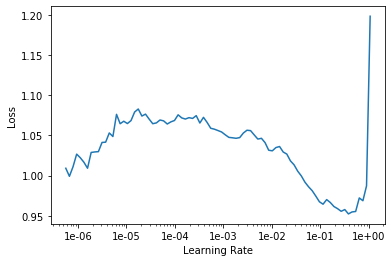

In [13]:
learn.recorder.plot()

In [14]:
lr = 1e-3
learn.fit_one_cycle(25, max_lr=lr)

epoch,train_loss,valid_loss,time
0,0.423282,0.416905,01:27
1,0.015184,0.016815,01:23
2,0.003964,0.003886,01:45
3,0.001349,0.001760,01:41
4,0.001343,0.001256,01:37
5,0.004896,0.001205,01:51
6,0.001641,0.001071,01:28
7,0.000888,0.000983,01:50
8,0.001037,0.000920,01:35
9,0.000861,0.000842,01:30


In [15]:
learn.fit_one_cycle(15, max_lr=1e-4)

epoch,train_loss,valid_loss,time
0,0.000241,0.000294,01:22
1,0.000405,0.000297,01:22
2,0.000237,0.000291,01:23
3,0.000367,0.000310,01:21
4,0.000245,0.000293,01:22
5,0.000503,0.000284,01:22
6,0.000430,0.000276,01:21
7,0.000316,0.000275,01:22
8,0.000172,0.000271,01:22
9,0.000265,0.000269,01:21


In [ ]:
learn.fit_one_cycle(15, max_lr=1e-4)

epoch,train_loss,valid_loss,time
0,0.000251,0.000248,01:23
1,0.000929,0.000255,01:22
2,0.000200,0.000253,01:27
3,0.000207,0.000254,01:50
4,0.000244,0.000260,01:58
5,0.000205,0.000257,01:35


In [16]:
inp = learn.data.train_ds.tensors[0][0]
outp = model(learn.data.train_ds.tensors[0][0])
print('Input:', inp)
print('Output:', outp)

Input: tensor([ 0.6136,  0.0878, -0.8069, -0.5152])
Output: tensor([ 0.6154,  0.0850, -0.8192, -0.5163], grad_fn=<AddBackward0>)


In [17]:
learn.data.train_ds.tensors[0][0]

tensor([ 0.6136,  0.0878, -0.8069, -0.5152])